In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [5]:
row_train = pd.read_csv('train.csv', sep=',')
row_val = pd.read_csv('validation.csv', sep=',')
row_test = pd.read_csv('test.csv', sep=',')
x_tr = pd.DataFrame(row_train, columns=['slotprice','weekday', 'hour', 'region', 'city', 'useragent', 'slotwidth','slotheight','slotvisibility', 'slotformat'])
y_tr = row_train.payprice
display(x_tr.head())
print(y_tr.describe())


,slotprice,weekday,hour,region,city,useragent,slotwidth,slotheight,slotvisibility,slotformat
0,5,5,22,2,2,windows_ie,200,200,2,0
1,0,1,20,238,239,windows_chrome,300,250,FourthView,Na
2,5,3,13,40,41,windows_ie,250,250,2,0
3,0,6,23,1,1,windows_ie,160,600,2,1
4,133,5,6,216,233,windows_ie,728,90,OtherView,Na


count    2.430981e+06
mean     7.815142e+01
std      5.984636e+01
min      0.000000e+00
25%      3.300000e+01
50%      6.800000e+01
75%      9.900000e+01
max      3.000000e+02
Name: payprice, dtype: float64


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
x_tr.useragent = labelencoder_X_1.fit_transform(x_tr.useragent)
labelencoder_X_2 = LabelEncoder()
x_tr.slotvisibility = labelencoder_X_2.fit_transform(x_tr.slotvisibility)
labelencoder_X_3 = LabelEncoder()
x_tr.slotformat = labelencoder_X_3.fit_transform(x_tr.slotformat)
display(x_tr.head(10))

,slotprice,weekday,hour,region,city,useragent,slotwidth,slotheight,slotvisibility,slotformat
0,5,5,22,2,2,31,200,200,2,0
1,0,1,20,238,239,29,300,250,6,3
2,5,3,13,40,41,31,250,250,2,0
3,0,6,23,1,1,31,160,600,2,1
4,133,5,6,216,233,31,728,90,8,3
5,0,4,17,276,277,31,336,280,2,1
6,20,3,12,80,89,31,1000,90,0,0
7,0,3,16,15,19,31,160,600,2,1
8,70,5,14,333,342,31,1000,90,0,0
9,70,5,0,2,2,29,1000,90,0,0


In [ ]:
"""""2"def floorprice(num):
    if num==0: y = 0
    elif num>=1 and num <=10: y = 1
    elif num>=11 and num <=50: y = 2
    elif num>=51 and num <=100: y = 3
    else: y = 4
    return y
n= x_tr.shape[0]
for i in range(n):
    x_tr.slotprice[i] = floorprice(x_tr.slotprice[i])
display(x_tr)

In [ ]:
x_tr = np.asarray(x_tr)
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,4,5,8,9])
x_tr = onehotencoder.fit_transform(x_tr).toarray()
display(x_tr)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_tr = pd.DataFrame(x_tr)
x_tr.to_csv('x_tr.csv')
print(x_tr.shape)

In [111]:
#x_tr = pd.read_csv('x_tr.csv')
#print(x_tr.shape)
#features with Bonnie cleaning
x_tr = pd.read_csv('new_x_train.csv')
y = pd.read_csv('new_y_train.csv')
y_tr = pd.DataFrame(y.click)
x_val = pd.read_csv('new_x_val.csv')
x_test = pd.read_csv('new_x_test.csv')
print(x_tr.shape)
print(x_val.shape)
print(x_test.shape)

(181093, 163)
(303925, 163)
(303375, 163)


In [115]:
#display(x_tr.head())
#display(x_tr.head())
display(x_tr['Unnamed: 0'])
#print(x_tr.index.values.tolist())

0         2225379
1         1960461
2          868665
3          713995
4          511358
5          837025
6         1396208
7          332358
8          283651
9          287406
10         966055
11         753464
12         682496
13        1564797
14        1823861
15        1222489
16        1195536
17         209181
18        1812142
19         195018
20         950326
21         431400
22        1613757
23         779244
24         346037
25        1119146
26        1676766
27         183970
28         542449
29        1185873
           ...   
181063    2068568
181064     707671
181065    1972700
181066     564955
181067     122359
181068    1989303
181069     509616
181070     124228
181071    2365321
181072    1945138
181073     991459
181074     606489
181075    2238436
181076     690835
181077     226861
181078      80722
181079     416172
181080    1397902
181081    1941251
181082    1170857
181083     763320
181084    2137998
181085    1430427
181086     425167
181087    

In [78]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'sigmoid', input_dim = 163))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
classifier.fit(x_tr, y_tr, batch_size = 10, nb_epoch = 2)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=163, units=10, kernel_initializer="uniform")`
  app.launch_new_instance()
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2
181093/181093 [==============================] - 825s 5ms/step - loss: 0.0099 - acc: 0.9901
Epoch 2/2
181093/181093 [==============================] - 826s 5ms/step - loss: 0.0099 - acc: 0.9901


In [81]:
y_pred_test = classifier.predict_proba(x_test)
y_pred_tr = classifier.predict_proba(x_tr)
y_pred_val = classifier.predict_proba(x_val)
display(y_pred_tr)

y_pred_val = pd.DataFrame(y_pred_val)
y_pred_tr = pd.DataFrame(y_pred_tr)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.to_csv('predproba_test_nn1.csv')

array([[-0.],
       [-0.],
       [-0.],
       ...,
       [-0.],
       [-0.],
       [-0.]], dtype=float32)

In [82]:
y_pred_val.to_csv('predproba_val_nn1.csv')

In [83]:
print(y_pred_tr.shape)

(181093, 1)


In [11]:
#MODEL NO. 2: with binary variables
x_tr2 = pd.DataFrame(row_train, columns=['slotprice','weekday', 'hour', 'region', 'useragent', 'slotwidth','slotheight','slotvisibility', 'slotformat'])
y_tr2 = row_train.payprice

labelencoder_X_1 = LabelEncoder()
x_tr2.useragent = labelencoder_X_1.fit_transform(x_tr2.useragent)
labelencoder_X_2 = LabelEncoder()
x_tr2.slotvisibility = labelencoder_X_2.fit_transform(x_tr2.slotvisibility)
labelencoder_X_3 = LabelEncoder()
x_tr2.slotformat = labelencoder_X_3.fit_transform(x_tr2.slotformat)

x_tr2 = np.asarray(x_tr2)

onehotencoder = OneHotEncoder(categorical_features = [1,2,3])
x_tr2 = onehotencoder.fit_transform(x_tr2).toarray()

sc = StandardScaler()
x_tr2 = sc.fit_transform(x_tr2)
x_tr2 = pd.DataFrame(x_tr2)
x_tr2.to_csv('x_tr2.csv')
print(x_tr2.shape)

(2430981, 72)


In [13]:
classifier2 = Sequential()
# Adding the input layer and the first hidden layer
classifier2.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu', input_dim = 72))
# Adding the second hidden layer
classifier2.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier2.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))
classifier2.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
classifier2.fit(x_tr2, y_tr2, batch_size = 10, nb_epoch = 100)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=72, units=30, kernel_initializer="uniform")`
  app.launch_new_instance()
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 113990/2430981 [>.............................] - ETA: 3:29:26 - loss: 3394.2540 - acc: 0.0105- ETA: 3: - ETA: 3:2

KeyboardInterrupt: 

In [10]:
#MODEL NO. 3:
x_tr3 = pd.DataFrame(row_train, columns=['slotprice','weekday', 'hour', 'region', 'useragent', 'slotwidth','slotheight','slotvisibility', 'slotformat'])
y_tr3 = row_train.payprice

y_mean = np.mean(row_train.payprice)
y_std = np.std(row_train.payprice)
y_tr3 = (y_tr3 - y_mean)/y_std

labelencoder_X_1 = LabelEncoder()
x_tr3.useragent = labelencoder_X_1.fit_transform(x_tr3.useragent)
labelencoder_X_2 = LabelEncoder()
x_tr3.slotvisibility = labelencoder_X_2.fit_transform(x_tr3.slotvisibility)
labelencoder_X_3 = LabelEncoder()
x_tr3.slotformat = labelencoder_X_3.fit_transform(x_tr3.slotformat)

x_tr3 = np.asarray(x_tr3)

onehotencoder = OneHotEncoder(categorical_features = [1,2,3])
x_tr3 = onehotencoder.fit_transform(x_tr3).toarray()

sc = StandardScaler()
x_tr3 = sc.fit_transform(x_tr3)
x_tr3 = pd.DataFrame(x_tr3)
print(x_tr3.shape)
display(x_tr3.shape)
display(y_tr3.describe())

(2430981, 72)


(2430981, 72)

count    2.430981e+06
mean    -2.653033e-16
std      1.000000e+00
min     -1.305868e+00
25%     -7.544557e-01
50%     -1.696247e-01
75%      3.483686e-01
max      3.706970e+00
Name: payprice, dtype: float64

In [ ]:
classifier3 = Sequential()
# Adding the input layer and the first hidden layer
classifier3.add(Dense(output_dim = 30, init = 'normal', activation = 'linear', input_dim = 72))
# Adding the second hidden layer
classifier3.add(Dense(output_dim = 30, init = 'normal', activation = 'linear'))
# Adding the output layer
classifier3.add(Dense(output_dim = 1, init = 'normal'))
classifier3.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
classifier3.fit(x_tr3, y_tr3, batch_size = 10, nb_epoch = 1)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", input_dim=72, units=30, kernel_initializer="normal")`
  app.launch_new_instance()
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=30, kernel_initializer="normal")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="normal")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
2044390/2430981 [========================>.....] - ETA: 49s - loss: 0.8978 - acc: 0.0000e+00

In [173]:
#Model no. 4
xg_train = pd.read_csv('sample/dtrain_predprob169.csv')
xg_test = pd.read_csv('sample/dtest_predprob169.csv')
xg_val = pd.read_csv('sample/dval_predprob169.csv')
index = pd.read_csv('index.csv')
#lr_val = pd.read_csv('pred_lr_val.csv')
#lr_test = pd.read_csv('pred_lr_test.csv')
#print(lr_train.head())
#print(lr_val.head())
#print(lr_test.head())
#print(lr_train)
print(xg_train.shape)
print(xg_test.shape)
print(xg_val.shape)


(91443, 1)
(303375, 1)
(303925, 1)


In [174]:
x_tr4 = pd.DataFrame(xg_train)
print(x_tr4.shape)
x_test4 = pd.DataFrame(xg_test)
x_val4 = pd.DataFrame(xg_val)
clicks = len(row_train[row_train.click==1])
impression = len(row_train[row_train.bidprice>row_train.payprice])
aCTR=clicks/impression
x_tr4 = x_tr4/aCTR
x_test4 = x_test4/aCTR
x_val4 = x_val4/aCTR

index = index['0']
#index = list(index)
y_tr4 = row_train.payprice[index]
#y_mean = np.mean(row_train.payprice)
#y_std = np.std(row_train.payprice)
#y_tr4 = (y_tr4 - y_mean)/y_std

y_val4 = row_val.payprice
display(x_tr4.shape)
print(y_tr4.head())
print(y_tr4.head())
print(x_tr4.shape)

(91443, 1)


(91443, 1)

224827      76
2238536     88
1395970    200
1330632    225
397740     151
Name: payprice, dtype: int64
224827      76
2238536     88
1395970    200
1330632    225
397740     151
Name: payprice, dtype: int64
(91443, 1)


In [181]:
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(output_dim = 100, init = 'normal', activation ='relu',input_dim = 1))
# Adding the second hidden layer
model.add(Dense(output_dim = 100, activation ='relu',init = 'normal'))
# Adding the output layer
model.add(Dense(output_dim = 1,init = 'normal'))
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])
history = model.fit(x_tr4, y_tr4, batch_size = 1, nb_epoch = 5)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=100, kernel_initializer="normal")`
  app.launch_new_instance()
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="normal")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="normal")`
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
91443/91443 [==============================] - 4676s 51ms/step - loss: 44.5110 - acc: 0.0088
Epoch 2/5
91443/91443 [==============================] - 5052s 55ms/step - loss: 43.6282 - acc: 0.0099
Epoch 3/5
91443/91443 [==============================] - 5559s 61ms/step - loss: 43.5302 - acc: 0.0119
Epoch 4/5
91443/91443 [==============================] - 5583s 61ms/step - loss: 43.5277 - acc: 0.0110
Epoch 5/5
91443/91443 [==============================] - 5440s 59ms/step - loss: 43.5353 - acc: 0.0124


In [182]:
train_score = classifier4.evaluate(x_tr4, y_tr4, verbose=0)
valid_score = classifier4.evaluate(x_val4, y_val4, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  0.0297 , Train Loss:  44.148
Val MAE:  0.0323 , Val Loss:  43.9182


In [188]:
y_pred_test2 = classifier4.predict(x_test4)
y_pred_tr2 = classifier4.predict(x_tr4)
y_pred_val2 = classifier4.predict(x_val4)
display(y_pred_tr2)
display(x_tr4.head(10))
display(y_tr4.head(10))

array([[70.53222 ],
       [69.608536],
       [70.071785],
       ...,
       [69.91867 ],
       [70.11092 ],
       [92.06777 ]], dtype=float32)

,pCTR
0,5.851756
1,13.762963
2,9.773087
3,347.844727
4,9.564919
5,5.394247
6,8.520240
7,5.972116
8,6.975187
9,16.503791


224827      76
2238536     88
1395970    200
1330632    225
397740     151
45265      104
1065063    193
2307453     70
389379      67
1011890    105
Name: payprice, dtype: int64

In [189]:
#y_pred_val2 = (y_pred_val2*y_std) + y_mean
#y_pred_tr2 = (y_pred_tr2*y_std) + y_mean
#y_pred_test2 = (y_pred_test2*y_std) + y_mean

y_pred_val2 = pd.DataFrame(y_pred_val2)
y_pred_tr2 = pd.DataFrame(y_pred_tr2)
y_pred_test2 = pd.DataFrame(y_pred_test2)
y_pred_test2.to_csv('pred_bidprice1.csv')
print(y_pred_tr2)

                0
0       70.532219
1       69.608536
2       70.071785
3      104.371895
4       70.096230
5       70.585930
6       70.218887
7       70.518082
8       70.400307
9       69.290733
10      69.947594
11      69.228302
12      69.336014
13      69.535286
14      70.169167
15      69.471603
16      69.990196
17      68.579163
18      66.309204
19      69.045982
20      69.173302
21      70.616096
22      69.812454
23      69.161934
24      70.406639
25      69.222191
26      70.170006
27      70.311287
28      70.760475
29      70.717010
...           ...
91413   68.565704
91414  102.084183
91415  255.301498
91416  229.546783
91417   70.071510
91418  225.177826
91419  127.441856
91420   65.075211
91421   67.814766
91422  239.672272
91423  238.596191
91424   69.405060
91425  244.234619
91426  234.661316
91427   69.005707
91428  213.468964
91429  182.338470
91430  238.888916
91431   69.192116
91432  149.061371
91433  145.759491
91434   69.102386
91435   64.215645
91436   63

In [190]:
y_pred_val2.to_csv('val_bidprice1.csv')
y_pred_tr2.to_csv('train_bidprice1.csv')


In [200]:

def evalu(pred, data):
    budget=6250000
    impression=0
    click=0
    
    for row in range(0,data.shape[0]):
        if budget<data.payprice[row]:
            continue
        if pred.iloc[row,0]>data.payprice[row]:
            budget=budget-data.payprice[row]
            impression=impression+1
            if data.click[row]==1:
                click=click+1
    print('budget',budget)
    print('impression',impression )
    return click

a = evalu(y_pred_val2+1, row_val)
print(a)
#+1, 111
#+2, 106
#+0, 109

budget 0
impression 164446
111


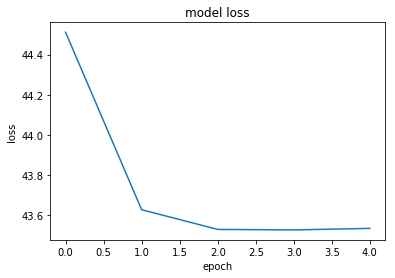

In [199]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
""""mask = row_train['click']==1
x_tr_click = x_tr[mask]
y_tr_click = y_tr[mask]
x_tr_click.reset_index(drop=True)
y_tr_click.reset_index(drop=True)
bidprice_real = pd.DataFrame(row_train[row_train['click']==1], columns = ['bidprice'])
bidprice_real.reset_index(drop=True)

print(x_tr_click.shape)
print(y_tr_click.shape)

In [ ]:
""""""""""
num_episodes=len(y_tr_click)
y = 0.95
eps = 0.5
decay_factor = 0.999
r_avg_list = []
budget=6250000
impression=0
click=0

for i in range(num_episodes):
    #s = env.reset()
    eps *= decay_factor
    if i % 100 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    r_sum = 0
    while not done:
        bidprice_est = classifier.predict(x_tr_click[i])
        if bidprice_est > bidprice_real[i]:
            a =
            done = True
        else:
            
        new_s, r, done, _ = env.step(a)
        target = r + y * np.max(model.predict(x_tr_click[i]))
        target_vec = model.predict(np.identity(5)[s:s + 1])[0]
        target_vec[a] = target
        model.fit(np.identity(5)[s:s + 1], target_vec.reshape(-1, 2), epochs=1, verbose=0)
        s = new_s
        r_sum += r
    r_avg_list.append(r_sum / 1000)

In [ ]:

"""""""""
def evaluate(bidprice):
    impression=0
    click=0
    for row in range(0,validation.shape[0]):
        if budget<validation.payprice[row]:
            continue
        if bidprice.iloc[row,0]>validation.payprice[row]:
            budget=budget-validation.payprice[row]
            impression=impression+1
            if validation.click[row]==1:
                click=click+1
    return click